# Multiple Linear Regression
## Bike sharing assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. .

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


### 1. Reading and understanding the data

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')


In [28]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)

In [3]:
# read the bikeshare data
bikeshare = pd.read_csv('day.csv')
bikeshare.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeshare.shape

(730, 16)

- this data has 16 columns and 730 rows

In [5]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- none of the columns has null values/missing values

In [6]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- `describe()` gives the overall description of numerical data. It can be clearly visible most of the columns are numerical
- hence this data should be analyzed and categorized 

### 2. Data Preparation

In [7]:
# Drop the unnecessary columns
bikeshare.drop(['instant','dteday','casual', 'registered'], axis=1, inplace=True)

#### Reasons for dropping columns:

- `instant` column is a unique value
- `dteday`  is a datetime column that can be dropped since we have the same data in `year` and `month` column
- as `atemp` column and `temp` column are highly correlated
- `casual` and `registered` columns are the sum of predictor `cnt`

In [8]:
bikeshare.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Categorical variables - Preperation

In [9]:
#Categorical - season
bikeshare['season'] = bikeshare['season'].map({1:'spring',2:'summer', 3:'fall',4:'winter'})

#Categorical - weathersit
bikeshare['weathersit'] = bikeshare['weathersit'].map({1:'Clear_FewClouds',2:'Mist_Cloudy',3:'Light_Snow_Rain',4:'Heavy_Rain_Snow'})

#Categorical - weekday
bikeshare['weekday'] = bikeshare['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

#Categorical - mnth
bikeshare['mnth'] = bikeshare['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [10]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [11]:
bikeshare.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


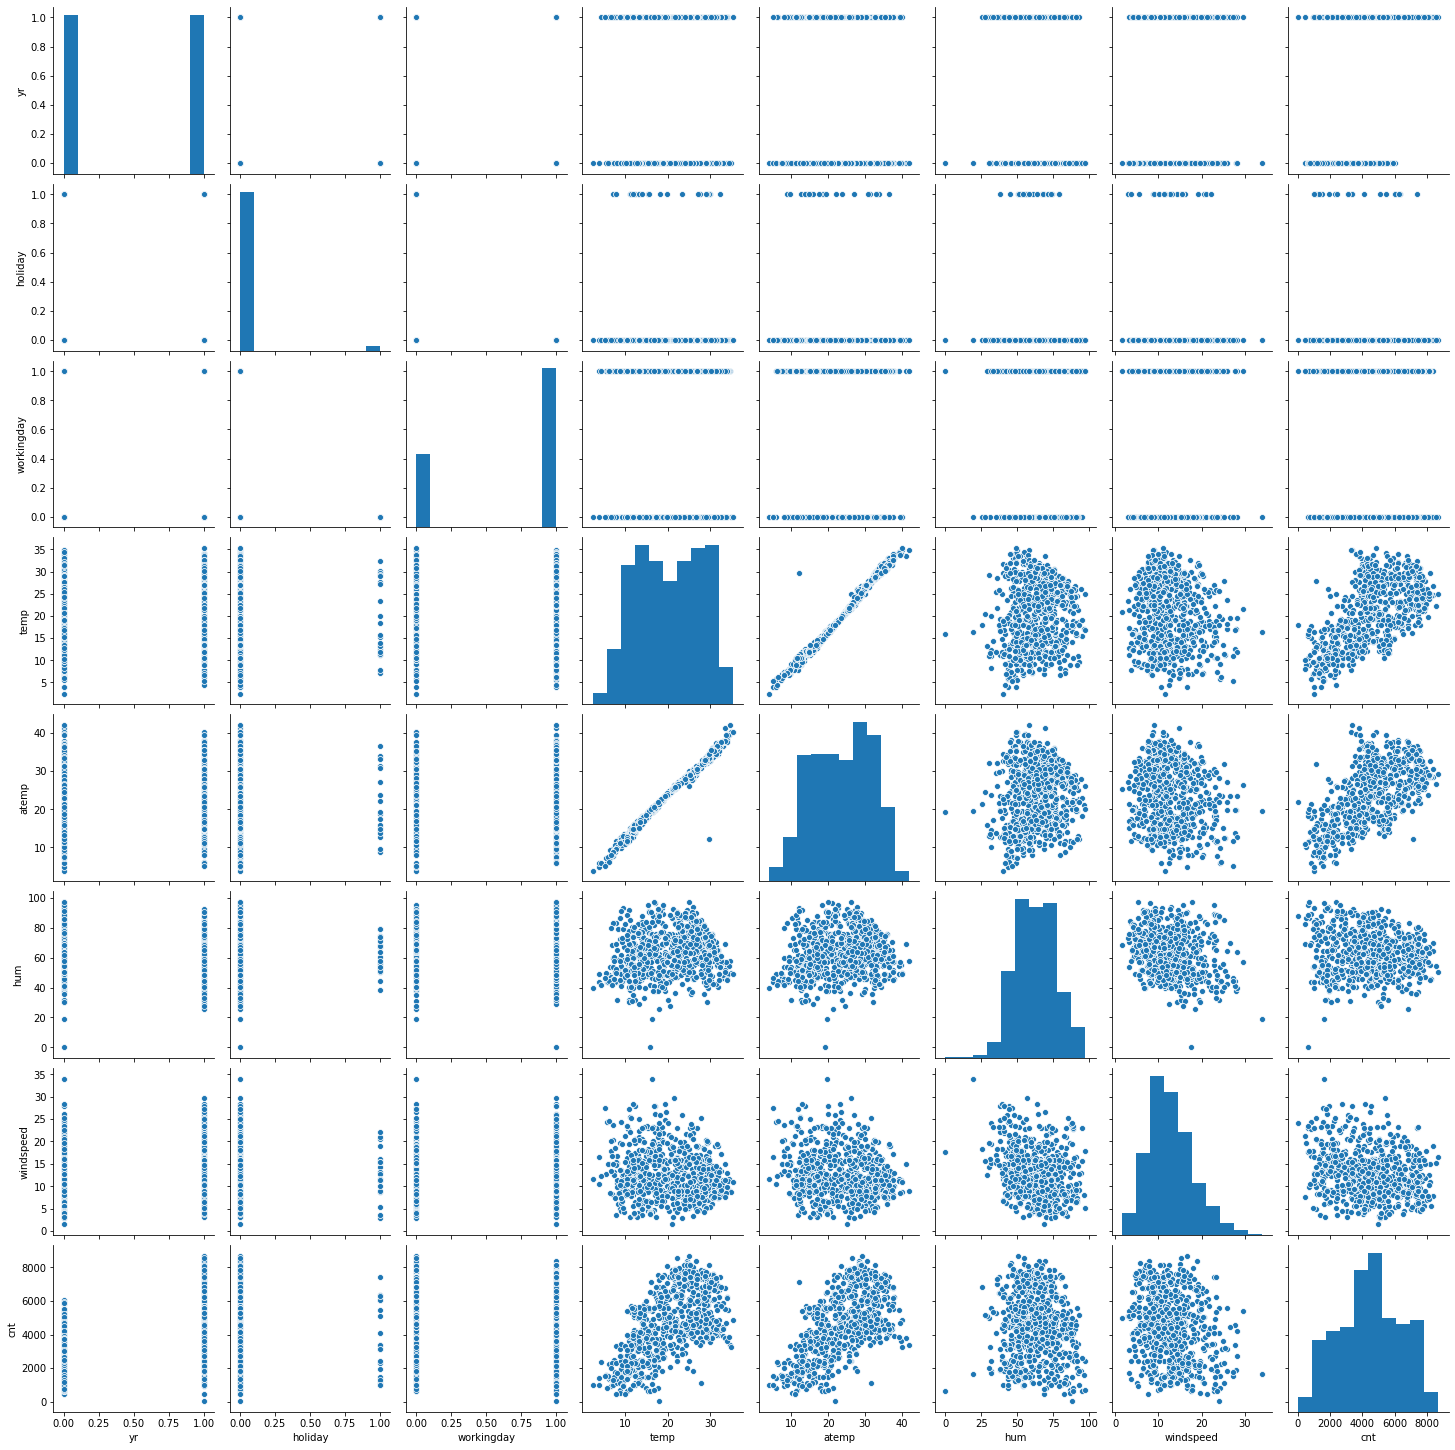

In [12]:
sns.pairplot(bikeshare)
plt.show()

#### Visualizing categorical variables

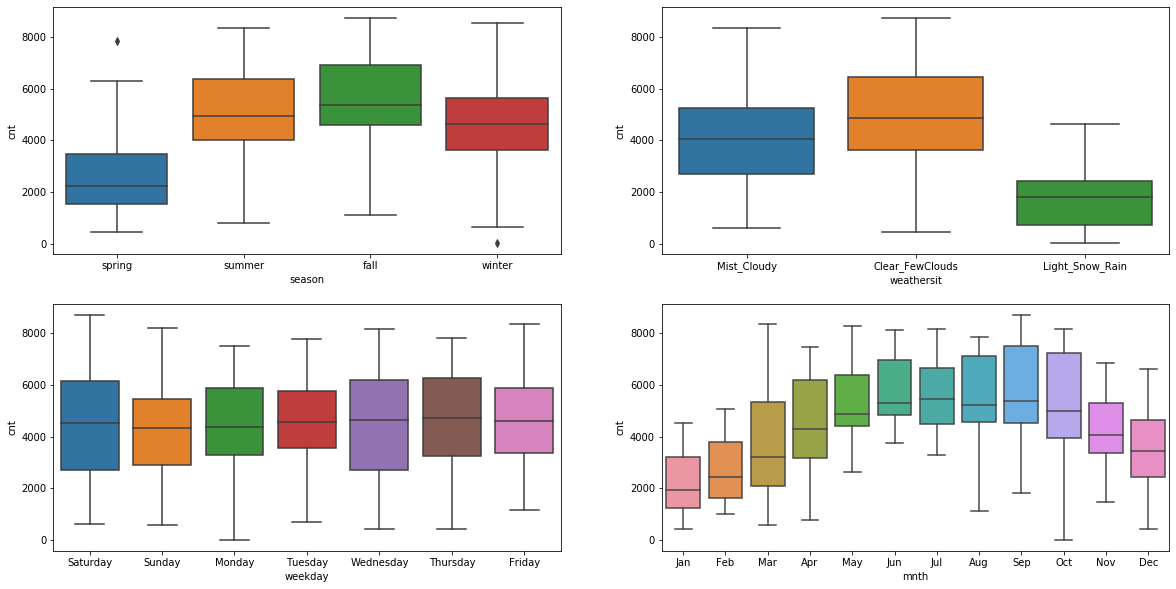

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=bikeshare)

plt.subplot(2,2,2)
sns.boxplot(x='weathersit', y='cnt', data=bikeshare)

plt.subplot(2,2,3)
sns.boxplot(x='weekday', y='cnt', data=bikeshare)

plt.subplot(2,2,4)
sns.boxplot(x='mnth', y='cnt', data=bikeshare)
plt.show()

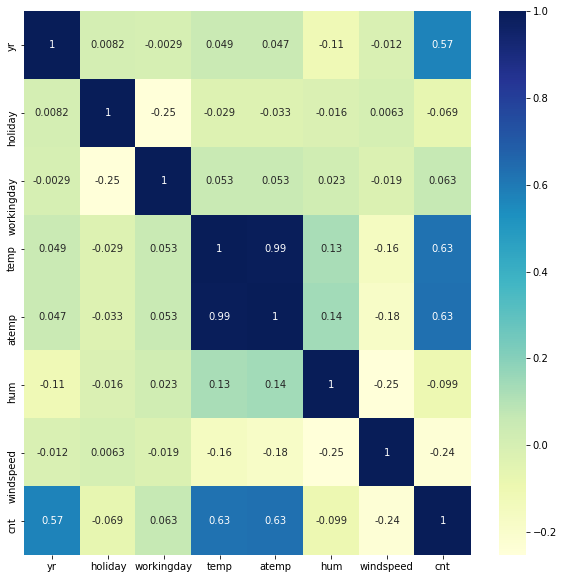

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(bikeshare.corr(), annot = True, cmap="YlGnBu")
plt.show()

- correlation of `temp` and `atemp` have high correlation, so one column `temp` can be dropped

In [15]:
bikeshare.drop('temp', axis=1,inplace=True)

###  Dummify variables

In [16]:
# Dummify season columns
season = pd.get_dummies(bikeshare['season'],drop_first = True)
# Add the results to the original bikeshare dataframe

bikeshare = pd.concat([bikeshare, season], axis = 1)

# Drop 'season' as we have created the dummies for it

bikeshare.drop(['season'], axis = 1, inplace = True)


In [17]:
bikeshare.head(5)

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Monday,1,Clear_FewClouds,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tuesday,1,Clear_FewClouds,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wednesday,1,Clear_FewClouds,11.46350,43.6957,12.522300,1600,1,0,0


In [18]:
# Dummify season columns
weather = pd.get_dummies(bikeshare['weathersit'],drop_first = True)
# Add the results to the original bikeshare dataframe

bikeshare = pd.concat([bikeshare, weather], axis = 1)

# Drop 'weathersit' as we have created the dummies for it

bikeshare.drop(['weathersit'], axis = 1, inplace = True)


In [19]:
bikeshare.head(5)

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow_Rain,Mist_Cloudy
0,0,Jan,0,Saturday,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [20]:
# Dummify season columns
weekday = pd.get_dummies(bikeshare['weekday'],drop_first = True)
# Add the results to the original bikeshare dataframe

bikeshare = pd.concat([bikeshare, weekday], axis = 1)

# Drop 'weathersit' as we have created the dummies for it

bikeshare.drop(['weekday'], axis = 1, inplace = True)


In [21]:
bikeshare.head(5)

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Jan,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


In [22]:
# Dummify season columns
mnth = pd.get_dummies(bikeshare['mnth'],drop_first = True)
# Add the results to the original bikeshare dataframe

bikeshare = pd.concat([bikeshare, mnth], axis = 1)

# Drop 'weathersit' as we have created the dummies for it

bikeshare.drop(['mnth'], axis = 1, inplace = True)


In [24]:
bikeshare.head(5)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Split the data into train and test

- First step in regression model building is to split `test data` and `train data`

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_train.head(5)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Rescaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light_Snow_Rain,Mist_Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


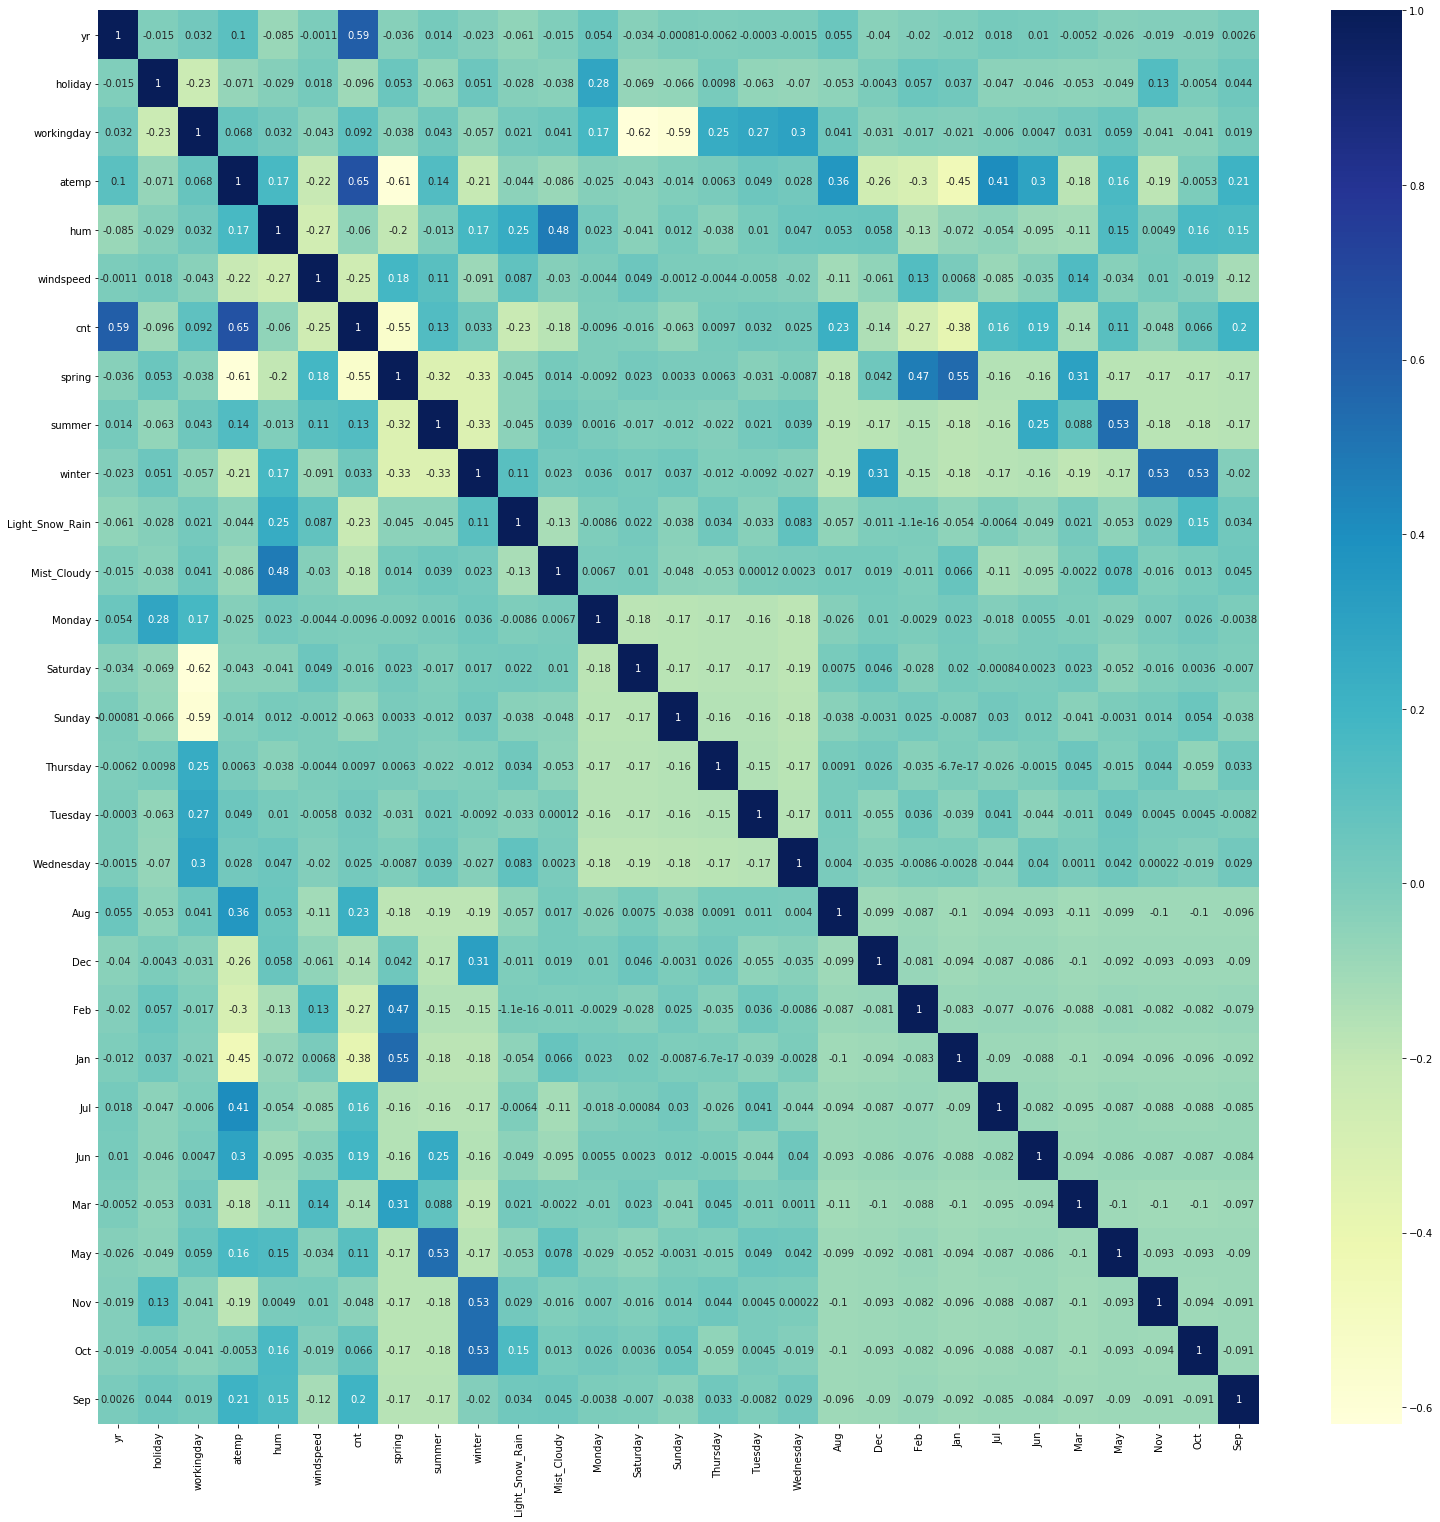

In [39]:

plt.figure(figsize = (26, 26))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()